In [ ]:
import preprocess
from dataset import ClipGPTFlickr8kDataset

# Preprocess Data (Data already saved to drive no need to run)
# preprocess.create_CLIP_embeddings_for_images(lang='arabic')
dataset = ClipGPTFlickr8kDataset('./data/embeddings/arabic_CLIP-ViT-B-32_embeddings.pkl', 10)


In [28]:
import pickle

data_path = './data/embeddings/arabic_CLIP-ViT-B-32_embeddings_tokens.pkl'
with open(data_path, 'rb') as f:
    data = pickle.load(f)

print(len(data))

3


In [27]:
from dataset import ClipGPTFlickr8kDataset
dataset = ClipGPTFlickr8kDataset('./data/embeddings/arabic_CLIP-ViT-B-32_embeddings.pkl', lang='arabic', prefix_length=10)

Data size is 24273


In [20]:
from transformers import AutoTokenizer, GPT2Tokenizer

In [23]:
tokenizer2 = GPT2Tokenizer.from_pretrained("gpt2")

In [21]:
tokenizer = AutoTokenizer.from_pretrained("akhooli/gpt2-small-arabic")

In [29]:
tokenizer.decode(data[0][0])

'طفلة صغيرة تتسلق إلى مسرح خشبي.'

In [30]:
tokenizer2.decode(data[0][0])

' gravySooy eats B96 Winsigh'

In [19]:
data[0][0:3], data[1][0:8], data[2]

([tensor([  148,   115,   149,   223, 13862, 45632, 17550,   113,   148,   118,
          22654, 26897, 45632, 17550,   103, 41486, 45692, 13862,   149,   224,
          17550,    98, 13862,   149,   231, 47048, 45692, 26897,   148,   255,
          17550,   106,   148,   112, 39848, 22654,   764]),
  tensor([  148,   115,   149,   223, 13862, 45632, 17550,   113,   148,   118,
          22654, 26897, 45632, 17550,   103, 41486, 45692, 13862,   149,   224,
          28981, 38843, 26897,   148,   105, 17550,    98, 13862,   149,   231,
          47048, 23338,   148,   110, 13862, 29519, 12919,   764]),
  tensor([  149,   223, 41486, 34247,   102, 17550,   113,   148,   118, 22654,
          26897, 45632, 18923,   223, 22654, 17550,   104, 30335, 39848, 42092,
          26897, 38843, 22654, 17550,   103,   148,   108, 29519, 39848, 17550,
             98, 13862,   149,   231, 28981, 25405,   149,   224,   148,   113,
          30335, 26897, 45632, 28981,   148,   106,   148,   112, 39848

In [6]:
data['clip_embedding'].shape

torch.Size([24273, 512])

In [10]:
data['captions'][0]

{'image_id': '1000268201_693b08cb0e.jpg',
 'caption': 'طفلة صغيرة تتسلق إلى مسرح خشبي .',
 'clip_embedding': 0}

The Lang is arabic


c:\Users\Edin\anaconda3\envs\mlp\lib\site-packages\transformers\models\auto\modeling_auto.py:1248: FutureWarning: The class `AutoModelWithLMHead` is deprecated and will be removed in a future version. Please use `AutoModelForCausalLM` for causal language models, `AutoModelForMaskedLM` for masked language models and `AutoModelForSeq2SeqLM` for encoder-decoder models.
  warnings.warn(


״״״״״


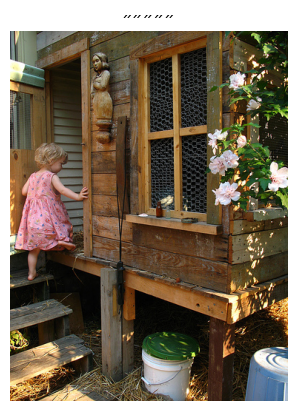

؂ وتسبب والسجنسارة� والسجنسارة� والسجن


c:\Users\Edin\anaconda3\envs\mlp\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 1538 (\N{ARABIC FOOTNOTE MARKER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Edin\anaconda3\envs\mlp\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Matplotlib currently does not support Arabic natively.
  fig.canvas.print_figure(bytes_io, **kw)


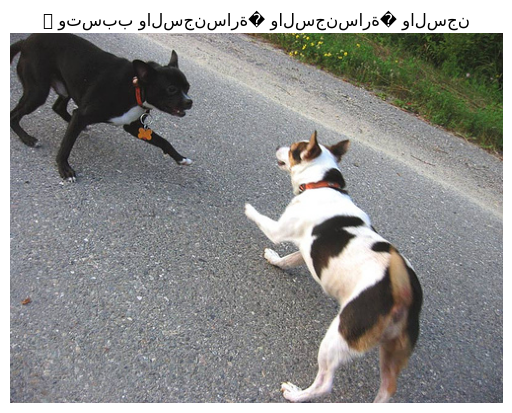

 معاهدات׫ وتسبب اصدر� معاهدات׫ وتسبب


c:\Users\Edin\anaconda3\envs\mlp\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 1515 (\u05eb) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Edin\anaconda3\envs\mlp\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Matplotlib currently does not support Hebrew natively.
  fig.canvas.print_figure(bytes_io, **kw)


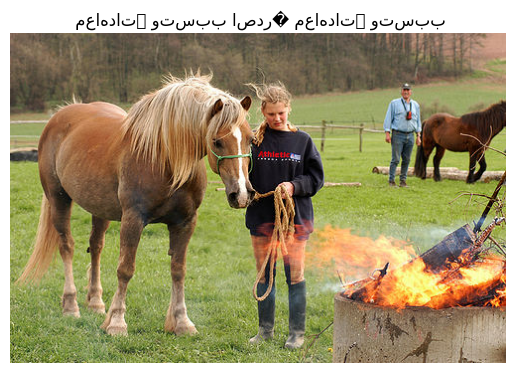

״״״״״


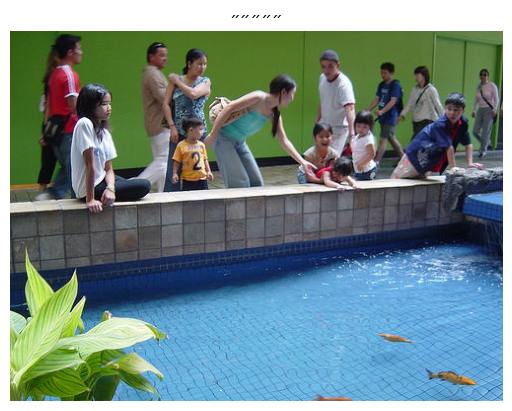

״״״״״


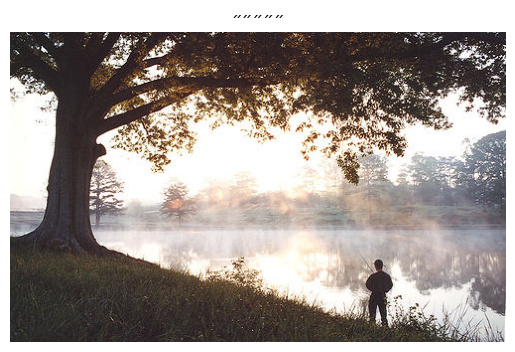

״״״״״


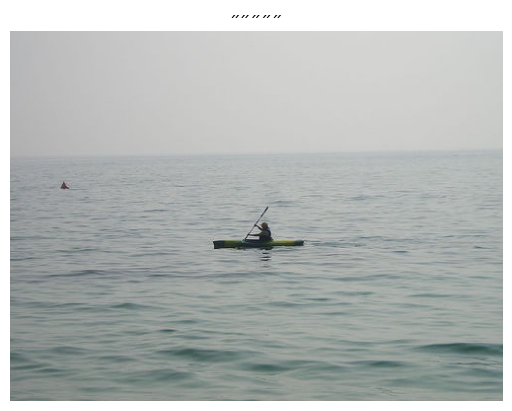

؂ وتسبب والسجنسارة� والسجنسارة� والسجن


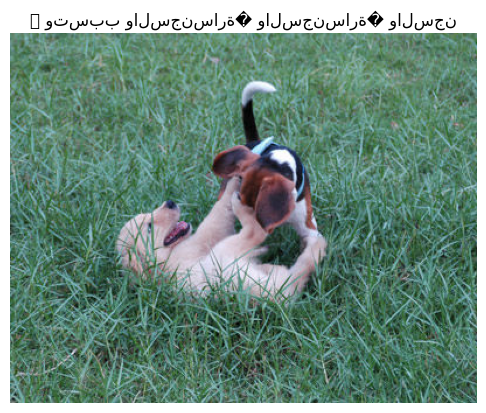

׫ وتسبب؀ أثيرسارة� وتسبب�


c:\Users\Edin\anaconda3\envs\mlp\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 1536 (\N{ARABIC NUMBER SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


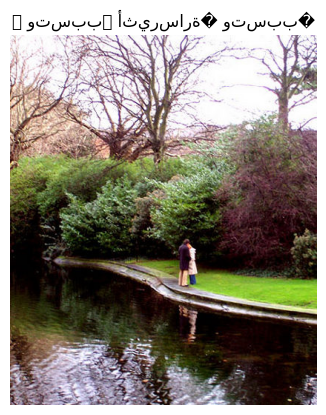

עميناسارة�ميناسارة�ميناسارة


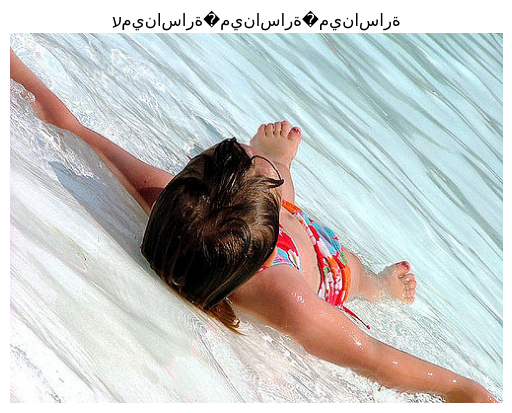

؀ أثير معاهدات׹ أثيرسارة�سارة


c:\Users\Edin\anaconda3\envs\mlp\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 1529 (\u05f9) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


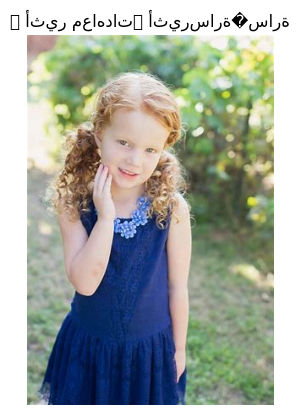

In [1]:
####### Run Inference On Sample Images ################
import inference_gpt
ckpt_path = './checkpoints/arabic_exp_2-009.pt'
inference_gpt.main(ckpt_path)

In [ ]:
from bleu import belu_score


model_path = './checkpoints/arabic_exp_2-009.pt'


belu_score(model_path)

In [ ]:
import os
import clip
import json
import torch
import PIL.Image 
import pandas as pd
from tqdm import tqdm
import skimage.io as io
from nltk.translate.bleu_score import corpus_bleu
from inference_gpt import load_model, beam_search
from transformers import AutoTokenizer, GPT2Tokenizer

def prepare_data_for_bleu(file_path, n=200):    
    with open(file_path, 'r') as f:
        data = json.load(f)
    sample_image_captions = [item['caption'] for item in data]
    sample_image_ids = [item['image_id'] for item in data]
    unique_image_ids = list(set(sample_image_ids))
    unique_image_ids = unique_image_ids[:n]
    
    image_ids_occurences = []
    for image_id in unique_image_ids:
        image_ids_occurences.append([i for i, x in enumerate(sample_image_ids) if x == image_id])
    captions_per_image = []
    for image_id_occurence in image_ids_occurences:
        captions_per_image.append([sample_image_captions[i] for i in image_id_occurence])
    sample_images_paths = [os.path.join(sample_images_dir, image_name) for image_name in unique_image_ids]

    return captions_per_image, sample_images_paths
    
    

def generate_caption(image_path, model, preprocess, clip_model, tokenizer ,prefix_length,  lang ,device):
    image = io.imread(image_path)
    pil_image = PIL.Image.fromarray(image)
    image = preprocess(pil_image).unsqueeze(0).to(device)
    with torch.no_grad():
        prefix = clip_model.encode_image(image).to(device, dtype=torch.float32)
        prefix_embed = model.clip_project(prefix).reshape(1, prefix_length, -1)
        generated_text_prefix = beam_search(model, tokenizer, embed=prefix_embed, entry_length=10)
    return generated_text_prefix


file_path = './data/annotations/arabic_captions.json'
model_path = './checkpoints/arabic_exp_1-029.pt'
sample_images_dir = './data/images/'

if 'english' in model_path:
    lang = 'english'
if 'arabic' in model_path:
    lang = 'arabic'

sample_image_captions, sample_images_paths = prepare_data_for_bleu(file_path)


# Load the CLIP model
device = 'cuda' if torch.cuda.is_available() else "cpu"
clip_model, preprocess = clip.load("ViT-B/32", device=device, jit=False)

# Load the GPT model Tokenizer
if lang == 'arabic':
    tokenizer = AutoTokenizer.from_pretrained("akhooli/gpt2-small-arabic")
if lang == 'english':
    tokenizer = GPT2Tokenizer.from_pretrained("gpt2")

# Load the GPT model
model, prefix_length = load_model(model_path)
model.eval()
model = model.to(device)

In [ ]:
candidates = []
references = []
for i in tqdm(range(len(sample_images_paths))):
    image_path = sample_images_paths[i]
    prediction = generate_caption(image_path, model,preprocess, clip_model, tokenizer, prefix_length, lang, device)
    candidates.append(prediction.split(' '))
    references.append([r.split(' ') for r in sample_image_captions[i]])

score = corpus_bleu(references, candidates) *100
print(f'The BLEU score is {score}')

In [ ]:
references

In [ ]:
candidates

In [ ]:
import json

#data
file_path = './data/annotations/arabic_captions.json'
with open(file_path, 'r') as f:
    data = json.load(f)

sample_image_captions = [item['caption'] for item in data]
sample_image_ids = [item['image_id'] for item in data]